# Data Cleaning for OpenFoodFacts

## Dataset Description

Dataset Description...

In [1]:
# Import libraries

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import csv

#import re
import regex as re

import os
from pathlib import Path

In [46]:
# Parameters

path = str(Path(os.path.abspath(os.getcwd())).parent.absolute())
openfoodfactsUrl = path + '/data/en.openfoodfacts.org.products.csv'
foodtableUrl = path + '/data/data_2.tsv'

ingredients_tx = path + '/data/ingredients.txt'
additives_tx = path + '/data/additives.txt'
vitamins_tx = path + '/data/vitamins.txt'
packaging_materials_tx = path + '/data/packaging_materials.txt'
packaging_shapes_tx = path + '/data/packaging_shapes.txt'
labels_tx = path + '/data/labels.txt'

savePath =  path + '/data/foodDB/'

## Helper Functions

Helper functions...

In [5]:
# Plotting the dataset

def plotMissingValues(dataframe, width, high, character=False):
    plt.figure(figsize=(width, high)) 
    if character==False:
        ax = dataframe.isnull().sum().plot.barh(color='skyblue') 
    else:
        occurrences = (dataframe == character).sum().sort_values(ascending=True)
        ax = occurrences.plot.barh(color='skyblue') 


    # Customizing the plot

    plt.title('Missing Values per Column', fontsize=16)
    plt.xlabel('Number of Missing Values', fontsize=12)
    plt.ylabel('Columns', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7) 
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)


    # Display the values on the bars
    
    if character==False:
        for i, v in enumerate(dataframe.isnull().sum()):
            ax.text(v + 500, i, str(v), color='gray', va='center', fontsize=8)
    else:
        for i, v in enumerate(occurrences):
            ax.text(v + 500, i, str(v), color='gray', va='center', fontsize=8)

    plt.tight_layout()
    plt.show()

## Import Data (Chunk)

Load the data (one chunk) from a .tsv file

In [6]:
# Load the data
chunk_size = 100000
chunks_df = pd.read_csv(openfoodfactsUrl, sep="\t", chunksize=chunk_size)

for chunk_df in chunks_df:
    print(chunk_df.shape)
    break

(100000, 203)


E:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,9,15,31,33,70) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Data Exploration (Chunk)

Data Exploration...

In [7]:
# View columns name

print(chunk_df.columns.values)

chunk_df.shape

['code' 'url' 'creator' 'created_t' 'created_datetime' 'last_modified_t'
 'last_modified_datetime' 'last_modified_by' 'product_name'
 'abbreviated_product_name' 'generic_name' 'quantity' 'packaging'
 'packaging_tags' 'packaging_en' 'packaging_text' 'brands' 'brands_tags'
 'categories' 'categories_tags' 'categories_en' 'origins' 'origins_tags'
 'origins_en' 'manufacturing_places' 'manufacturing_places_tags' 'labels'
 'labels_tags' 'labels_en' 'emb_codes' 'emb_codes_tags'
 'first_packaging_code_geo' 'cities' 'cities_tags' 'purchase_places'
 'stores' 'countries' 'countries_tags' 'countries_en' 'ingredients_text'
 'ingredients_tags' 'ingredients_analysis_tags' 'allergens' 'allergens_en'
 'traces' 'traces_tags' 'traces_en' 'serving_size' 'serving_quantity'
 'no_nutrition_data' 'additives_n' 'additives' 'additives_tags'
 'additives_en' 'nutriscore_score' 'nutriscore_grade' 'nova_group'
 'pnns_groups_1' 'pnns_groups_2' 'food_groups' 'food_groups_tags'
 'food_groups_en' 'states' 'states_tags' 

(100000, 203)

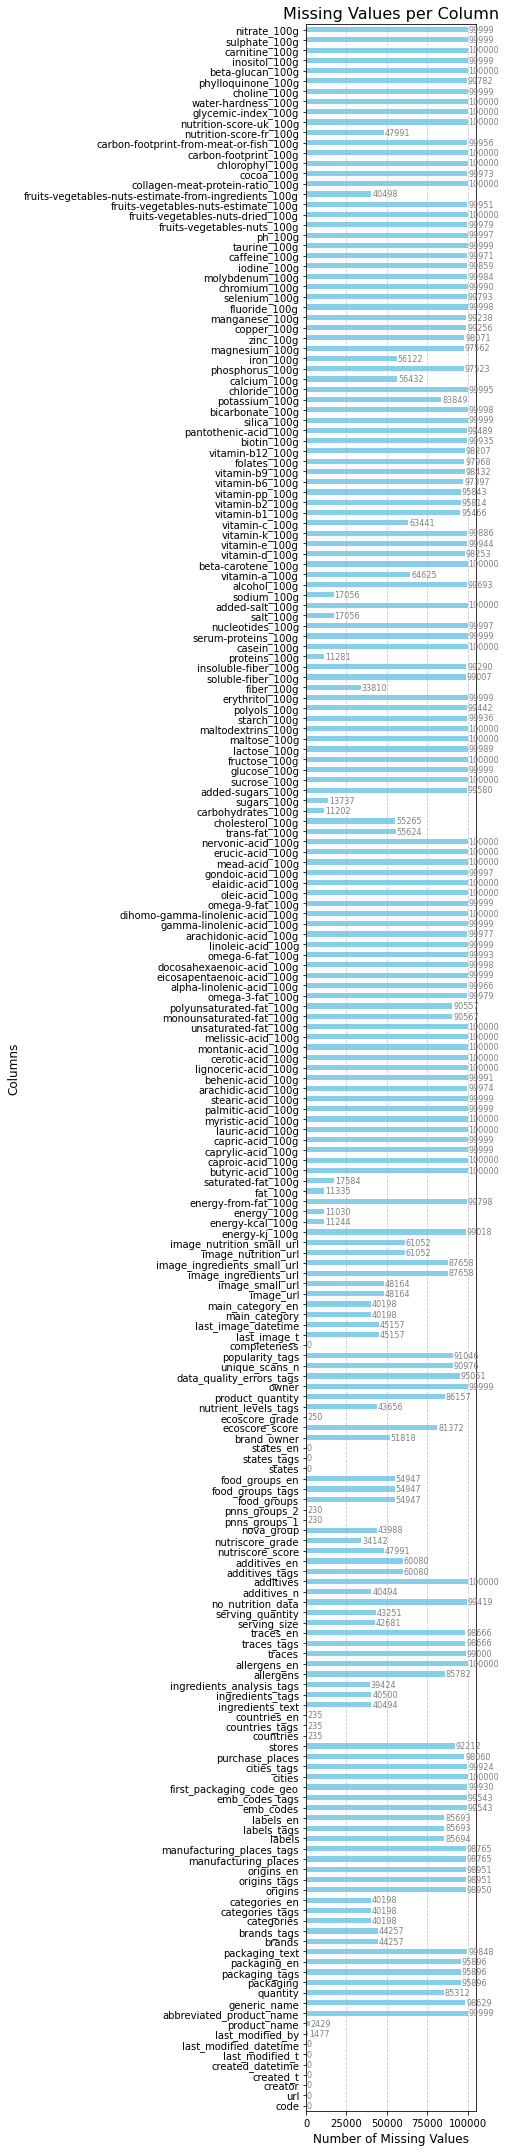

In [8]:
# Plotting the dataset
    
plotMissingValues(chunk_df, 7, 30)

## Import Data

Load the data from a .tsv file

In [9]:
# Create the filter
# $ = keep as is | - = don't keep | ? - keep as optional | t = translate

df_filter = ["code", #$$$$$$
             "product_name", #$$$$$$
             "packaging_tags", #?t?t?t (enumerate)
             "brands", #??????
             "brands_tags", #??????
             "labels_en", #t?t?t? (da processare)
             "countries_en", #$$$$$$ (importare il dataset poi - o countries-tags)
             "ingredients_tags", #$t$t$t (tassonomia - o ingredients_text o ingredients_analysis_tags)
             "serving_size", #??????
             "additives_n", #------ Usato solo per processare additives_tags
             "additives_tags", #?????? (importare il dataset poi)
             "nutriscore_score", #??????
             "nutriscore_grade", #??????
             "nova_group", #??????
             "food_groups", #??????
             "food_groups_tags", #?????? (o food_groups_en)
             "brand_owner", #??????
             "ecoscore_grade", #??????
             #"main_category_en", #------ (sostituito da food_groups_en)
             "energy-kcal_100g", #$$$$$$
             "energy_100g", #$$$$$$
             "fat_100g", #$$$$$$$
             "saturated-fat_100g", #??????
             "trans-fat_100g", #??????
             "cholesterol_100g", #??????
             "carbohydrates_100g", #$$$$$$
             "sugars_100g", #??????
             "fiber_100g", #??????
             "proteins_100g", #$$$$$$
             "salt_100g", #??????
             "sodium_100g", #??????
             "vitamin-a_100g", #??????
             "vitamin-c_100g", #??????
             "calcium_100g", #??????
             "iron_100g"] #??????

In [10]:
filter_df = pd.read_csv(openfoodfactsUrl, sep="\t", usecols=df_filter)

E:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,50,54,65) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Data Exploration

Data Exploration...

In [11]:
# View columns name

print(filter_df.columns.values)

filter_df.shape

['code' 'product_name' 'packaging_tags' 'brands' 'brands_tags' 'labels_en'
 'countries_en' 'ingredients_tags' 'serving_size' 'additives_n'
 'additives_tags' 'nutriscore_score' 'nutriscore_grade' 'nova_group'
 'food_groups' 'food_groups_tags' 'brand_owner' 'ecoscore_grade'
 'energy-kcal_100g' 'energy_100g' 'fat_100g' 'saturated-fat_100g'
 'trans-fat_100g' 'cholesterol_100g' 'carbohydrates_100g' 'sugars_100g'
 'fiber_100g' 'proteins_100g' 'salt_100g' 'sodium_100g' 'vitamin-a_100g'
 'vitamin-c_100g' 'calcium_100g' 'iron_100g']


(3022567, 34)

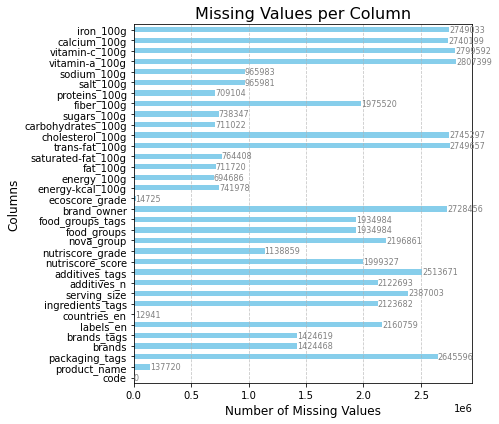

In [12]:
# Plotting the dataset
    
plotMissingValues(filter_df, 7, 6)

## Data Cleaning

Data Cleaning...

In [13]:
# Replace null values in additives_tags with empty string if additives_n is 0

def replace_null(row):
    if row['additives_n'] == 0 and pd.isnull(row['additives_tags']):
        return ""
    else:
        return row['additives_tags']
    
def replace_null_bycoll(row, col):
    if pd.isnull(row[col]):
        return ""
    else:
        return row[col]
    

filter_df['additives_tags'] = filter_df.apply(replace_null, axis=1)

filter_df["packaging_tags"] = filter_df.apply(replace_null_bycoll, args=('packaging_tags',), axis=1)
filter_df["brands"] = filter_df.apply(replace_null_bycoll, args=('brands',), axis=1)
filter_df["brands_tags"] = filter_df.apply(replace_null_bycoll, args=('brands_tags',), axis=1)
filter_df["labels_en"] = filter_df.apply(replace_null_bycoll, args=('labels_en',), axis=1)
filter_df["serving_size"] = filter_df.apply(replace_null_bycoll, args=('serving_size',), axis=1)
filter_df["nutriscore_score"] = filter_df.apply(replace_null_bycoll, args=('nutriscore_score',), axis=1)
filter_df["nutriscore_grade"] = filter_df.apply(replace_null_bycoll, args=('nutriscore_grade',), axis=1)
filter_df["nova_group"] = filter_df.apply(replace_null_bycoll, args=('nova_group',), axis=1)
filter_df["food_groups"] = filter_df.apply(replace_null_bycoll, args=('food_groups',), axis=1)
filter_df["food_groups_tags"] = filter_df.apply(replace_null_bycoll, args=('food_groups_tags',), axis=1)
#filter_df["food_groups_en"] = filter_df.apply(replace_null_bycoll, args=('food_groups_en',), axis=1)
filter_df["brand_owner"] = filter_df.apply(replace_null_bycoll, args=('brand_owner',), axis=1)
filter_df["ecoscore_grade"] = filter_df.apply(replace_null_bycoll, args=('ecoscore_grade',), axis=1)
#filter_df["main_category_en"] = filter_df.apply(replace_null_bycoll, args=('main_category_en',), axis=1)
filter_df["saturated-fat_100g"] = filter_df.apply(replace_null_bycoll, args=('saturated-fat_100g',), axis=1)
filter_df["trans-fat_100g"] = filter_df.apply(replace_null_bycoll, args=('trans-fat_100g',), axis=1)
filter_df["cholesterol_100g"] = filter_df.apply(replace_null_bycoll, args=('cholesterol_100g',), axis=1)
filter_df["sugars_100g"] = filter_df.apply(replace_null_bycoll, args=('sugars_100g',), axis=1)
filter_df["fiber_100g"] = filter_df.apply(replace_null_bycoll, args=('fiber_100g',), axis=1)
filter_df["salt_100g"] = filter_df.apply(replace_null_bycoll, args=('salt_100g',), axis=1)
filter_df["sodium_100g"] = filter_df.apply(replace_null_bycoll, args=('sodium_100g',), axis=1)
filter_df["vitamin-a_100g"] = filter_df.apply(replace_null_bycoll, args=('vitamin-a_100g',), axis=1)
filter_df["vitamin-c_100g"] = filter_df.apply(replace_null_bycoll, args=('vitamin-c_100g',), axis=1)
filter_df["calcium_100g"] = filter_df.apply(replace_null_bycoll, args=('calcium_100g',), axis=1)
filter_df["iron_100g"] = filter_df.apply(replace_null_bycoll, args=('iron_100g',), axis=1)

In [14]:
# Apply the filter to the Dataframe

food_table = filter_df[df_filter].copy()

food_table["isempty"] = np.where(food_table.isnull().sum(axis=1) >= 1, 1, 0)
percentage = food_table.isempty.value_counts()[1] / food_table.shape[0] * 100
print("Percentage of dropped rows: " + str(percentage))

food_table = food_table[food_table.isempty==0].copy()
food_table.isnull().sum()

food_table.drop("isempty", inplace=True,axis=1)
food_table.dropna(axis = 0, how = "any", inplace=True)

Percentage of dropped rows: 75.54049256807211


In [15]:
food_table.shape

(739305, 34)

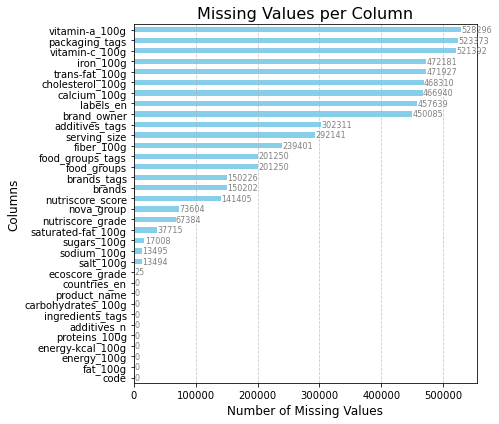

In [16]:
# Plotting the dataset
    
plotMissingValues(food_table, 7, 6, character="")

In [17]:
pd.set_option('display.max_columns', None)
food_table.head()

,code,product_name,packaging_tags,brands,brands_tags,labels_en,countries_en,ingredients_tags,serving_size,additives_n,additives_tags,nutriscore_score,nutriscore_grade,nova_group,food_groups,food_groups_tags,brand_owner,ecoscore_grade,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g
32,0000000001199,Solène céréales poulet,,CROUS,crous,,France,"en:antioxidant,en:colour,en:tomato,en:vegetabl...",,5,"en:e150,en:e160a,en:e202,en:e316,en:e466",,unknown,4,,,,unknown,219.0,916.0,5.9,0.5,,,30.3,1.7,2.8,9.7,0.464,0.1856,,,,
40,0000000001663,Crème dessert chocolat,,Ferme De La Frémondière,ferme-de-la-fremondiere,,France,"en:whole-milk,en:dairy,en:milk,en:sugar,en:add...",,1,en:e406,,unknown,4,,,,unknown,0.0,0.0,0.0,0,,,0.0,0,,0.0,0,0,,,,
49,0000000002264,Baguette Poitevin,,Crous resto,crous-resto,,France,"fr:baguette-poite-vin-pain-baguette,en:water,e...",,0,,,unknown,4,,,,unknown,207.0,866.0,6.7,3.8,,,27.5,0.6,1.7,8.9,0.4,0.16,,,,
62,0000000003827,Suedois saumon,,Crous,crous,,France,"fr:paln-suedois,en:water,en:rye-flour,en:flour...",,2,"en:e300,en:e503",,unknown,4,,,,unknown,172.0,720.0,4.4,1.2,,,23.3,4.6,2.7,8.4,3.58,1.432,,,,
68,0000000004510,Salade shaker taboulé,,Crous,crous,,France,"fr:taboule,en:vegetable,en:colza-oil,en:oil-an...",,1,en:e202,,unknown,4,,,,unknown,114.0,477.0,8.1,0.9,,,5.7,1.4,1.7,3.9,0.31,0.124,,,,


## Save or Load the Dataset

In [18]:
# Save the new Dataset

food_table.to_csv(path + '/data/data_2.tsv', sep='\t', index=False)

In [3]:
# Import the Dataset

#food_table = pd.read_csv(foodtableUrl, sep="\t", na_values=['unknown'], keep_default_na=False)
food_table = pd.read_csv(foodtableUrl, sep="\t", na_values='unknown')

E:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Ingredients Counter

In [20]:
ingredients_map = {}

def cl_ingredients(text, ingredients_map, debug = False):
    

    # Pattern to split the text
    
    # pattern = r"[,.()\[\]{}]"
    pattern = r"[,]"
    split_text = re.split(pattern, text)

    for ingredient in split_text:
        if ingredient in ingredients_map:
            ingredients_map[ingredient] += 1
        else:
            ingredients_map[ingredient] = 1
    
   
    if debug:
        print(text)
#        print(text)
        
    #return ', '.join(result)

#cl_ingredients(food_table.at[32, 'ingredients_tags'], ingredients_map, False)
food_table['ingredients_tags'].apply(cl_ingredients, args=(ingredients_map,))
print(len(ingredients_map))

843048


In [21]:
# File path to save the CSV data
file_path = path + '/data/ingrediets_2.tsv'

sorted_ingredients = dict(sorted(ingredients_map.items(), key=lambda x: x[1], reverse=True))

# Writing the dictionary to a CSV file with tab-separated values
with open(file_path, 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file, delimiter='\t')
    writer.writerow(['Ingredient', 'Count'])  # Writing header
    for ingredient, count in sorted_ingredients.items():
        writer.writerow([ingredient, count])

print(f"Dictionary has been written to {file_path}")

Dictionary has been written to C:\Users\Vaidas\Documents\GitHub\graphle/data/ingrediets_2.tsv


## Read Taxonomy

In [71]:
def split_line(text):
    
    split_text = re.split(':', text)
    
    language_tag = split_text[0]
    ingredients_text = split_text[1]
    
    ingredients = re.split(', ', ingredients_text)
    stripped_ingredients = [ingredient.strip().lower().replace(" ", "-") for ingredient in ingredients]
    
    return language_tag, stripped_ingredients

def check_synonyms(in_item, synonym_set, stopword_set):
    out = []
    split_in_item = re.split(':', in_item)
    in_tag = split_in_item[0]
    if in_tag in synonym_set:
        for syn_list in synonym_set[in_tag]:
            for syn in syn_list:
                if re.search(f'(^{syn}-)|(-{syn}-)|-{syn}$',split_in_item[1]):
                    for syn2 in syn_list:
                        if syn != syn2:
                            out.append(re.sub(syn, syn2, split_in_item[1]))
            if len(out) != 0:
                break
    if len(out) != 0:
        print(in_item)
        print(out)
    return out
                
    
    

In [76]:
#Create synonym and stopword base

def extract_synonyms(file, synonym_set):
    
    cur_line = file.readline()
    while cur_line != '':
        if re.match('^synonyms:[a-z]{2}:', cur_line):
            new_item = re.match('^synonyms:[a-z]{2}:[^#]*', cur_line).group()
            split_item = re.split(':', new_item)
            new_tag = split_item[1]
            new_syns = []
            for word in re.split(',', split_item[2]):
                new_syns.append(word.strip().lower().replace(' ', '-'))
            if '' in new_syns:
                new_syns.remove('')
            if new_tag in synonym_set:
                synonym_set[new_tag].append(new_syns)
            else:
                synonym_set[new_tag] = [new_syns]
        cur_line = file.readline()
    return synonym_set


def extract_stopwords(file, stopword_set):
    
    cur_line = file.readline()
    while cur_line != '':
        if re.match('^stopwords:[a-z]{2}:', cur_line):
            new_item = re.match('^stopwords:[a-z]{2}:[^#]*', cur_line).group()
            split_item = re.split(':', new_item)
            new_tag = split_item[1]
            new_stops = []
            for word in re.split(',', split_item[2]):
                new_stops.append(word.strip().lower().replace(' ', '-'))
            if new_tag in stopword_set:
                stopword_set[new_tag].append(new_stops)
            else:
                stopword_set[new_tag] = [new_stops]
        cur_line = file.readline()
    return stopword_set

synonym_set = {}
stopword_set = {}

with open(ingredients_tx, 'r', encoding='utf-8') as file:
    extract_synonyms(file, synonym_set)
    file.seek(0)
    extract_stopwords(file, stopword_set)
    file.close()

with open(additives_tx, 'r', encoding='utf-8') as file:
    extract_synonyms(file, synonym_set)
    file.seek(0)
    extract_stopwords(file, stopword_set)
    file.close()
    
with open(vitamins_tx, 'r', encoding='utf-8') as file:
    extract_synonyms(file, synonym_set)
    file.seek(0)
    extract_stopwords(file, stopword_set)
    file.close()
    
with open(packaging_materials_tx, 'r', encoding='utf-8') as file:
    extract_synonyms(file, synonym_set)
    file.seek(0)
    extract_stopwords(file, stopword_set)
    file.close()
    
with open(packaging_shapes_tx, 'r', encoding='utf-8') as file:
    extract_synonyms(file, synonym_set)
    file.seek(0)
    extract_stopwords(file, stopword_set)
    file.close()
    
with open(labels_tx, 'r', encoding='utf-8') as file:
    extract_synonyms(file, synonym_set)
    file.seek(0)
    extract_stopwords(file, stopword_set)
    file.close()
    
print(synonym_set)
print(stopword_set)
    

{'en': [['fiber', 'fibre'], ['hydrolysed', 'hydrolyzed'], ['pasteurised', 'pasteurized'], ['wholemeal', 'whole', 'whole-grain', 'wholegrain', 'complete'], ['semi-wholemeal', 'semi-whole', 'semi-whole-grain', 'semi-wholegrain', 'semi-complete', 'semiwhole', 'semiwholemeal'], ['semi-sweet', 'semisweet'], ['fd&c', 'fd-and-c', 'fdc', 'ffdca', 'fdca'], ['n°', 'no', 'number', 'nb'], ['no1', 'n1', '1'], ['no2', 'n2', '2'], ['no3', 'n3', '3'], ['no4', 'n4', '4'], ['no5', 'n5', '5'], ['no6', 'n6', '6'], ['no7', 'n7', '7'], ['no8', 'n8', '8'], ['no9', 'n9', '9'], ['no10', 'n10', '10'], ['no11', 'n11', '11'], ['no12', 'n12', '12'], ['colour', 'color'], ['biobased', 'bio-based', 'biosourced', 'bio-sourced'], ['coloring', 'colouring', 'color', 'colour'], ['flavor', 'flavour', 'flavoring', 'flavouring'], ['gmos', 'genetically-modified-organisms', 'gmo'], ['rich-in', 'high-in'], ['msg', 'glutamate'], ['preservatives', 'conservatives'], ['seafood', 'sea-food'], ['without', '0%', 'free'], ['carbon', 'c

Ingredients

In [78]:
# Read the taxonomy line by line and add each element to a dictionary

"""ingredients_tx_map = {}
master = ''
master_tag = ''
start = True
count_masters = 0"""
ing_dict = {}

with open(ingredients_tx, 'r', encoding='utf-8') as file:
    
    cur_line = file.readline()
    while cur_line != '':
        cur_ing = ''
        super_items = []
        if re.match('^<?[a-z]{2}:', cur_line):
            while re.match('^<[a-z]{2}:', cur_line):
                new_item = re.match('^<[a-z]{2}:[^#]*', cur_line).group()
                new_item = re.split(':', new_item)[1]
                super_items.append(new_item.strip().lower().replace(' ', '-'))
                cur_line = file.readline()
            while cur_line != '\n' and cur_line != '':
                if re.match('^[a-z]{2}:', cur_line):
                    new_item = re.match('^[a-z]{2}:[^#]*', cur_line).group()
                    new_item = re.split(':', new_item)
                    new_tag = new_item[0]
                    new_items = re.split(',', new_item[1])
                    for item in new_items:
                        item = item.strip().lower().replace(' ', '-')
                    if cur_ing == '':
                        cur_ing = new_items[0].strip().lower().replace(' ', '-')
                        ing_dict[cur_ing] = [super_items,[]]
                    for item in new_items:
                        f_item = f"{new_tag}:{item.strip().lower().replace(' ', '-')}"
                        ing_dict[cur_ing][1].append(f_item)
                        for synoym in check_synonyms(f_item, synonym_set, stopword_set):
                            ing_dict[cur_ing][1].append(f"{new_tag}:{synoym}")
                cur_line = file.readline()
            #if(cur_ing != ''):
               # print(ing_dict[cur_ing])
        cur_line = file.readline()
    file.close()
    #print(ing_dict.keys())

"""with open(ingredients_tx, 'r', encoding='utf-8') as file:
    
    for line in file:
        
        # Iterate until ingredients
        if start and '# # # # # # # # # # # # # #' not in line:
            continue
        else:
            start = False
            
        # Check if there is a new section
        if line == '\n':
            master = ''
            #print('reset')
            
        # Skip the line if is a comment or if is not a valid line
        if '#' in line or line.count(':') != 1 or '<' in line:
            continue
        
        language_tag, ingredients = split_line(line)
        
        # Add the line to the dictionary
        if language_tag == 'en' or master == '':
            master = ingredients[0]
            master_tag = language_tag
            count_masters += 1
        
        for ingredient in ingredients:
            ingredient = ingredient
            ingredients_tx_map[language_tag+':'+ingredient] = master_tag+':'+master
        
        
    print('# of elements in the dictionary: ' + str(len(ingredients_tx_map)))
    print('# of master elements in the dictionary: ' + str(count_masters) + '\n')
    print(ingredients_tx_map)"""
        


es:jarabe-de-caramelo
['sirope-de-caramelo']
es:sirope-de-caramelo
['jarabe-de-caramelo']
es:jarabe-de-azúcar-caramelizado
['sirope-de-azúcar-caramelizado']
es:sirope-de-azúcar-caramelizado
['jarabe-de-azúcar-caramelizado']
pt:extrato-de-pimentão
['extracto-de-pimentão']
pt:extrato-de-pimento
['extracto-de-pimento']
fr:extrait-naturel-de-paprika
["extrait-d'origine-naturelle-de-paprika", 'extrait-origine-naturelle-de-paprika']
pt:extrato-natural-de-pimentão
['extracto-natural-de-pimentão']
pt:extrato-natural-de-pimento
['extracto-natural-de-pimento']
en:gmo-free-soy-lecithin
['gmos-free-soy-lecithin', 'genetically-modified-organisms-free-soy-lecithin']
en:non-gmo-soy-lecithin
['non-gmos-soy-lecithin', 'non-genetically-modified-organisms-soy-lecithin']
bg:соев-лецитин-без-гмо
['соев-лецитин-без-генетично-модифицирани-организми']
fi:gmo-vapaa-soijalesitiini
['gmo-ilman-soijalesitiini', 'gmo-0%-soijalesitiini']
fr:lécithine-de-soja-sans-ogm
['lécithine-de-soja-sans-ogms', 'lécithine-de-so

en:pasteurized-whipping-cream
['pasteurised-whipping-cream']
en:skim-milk-and-pasteurized-cream
['skim-milk-and-pasteurised-cream']
en:pasteurized-crème-fraîche
['pasteurised-crème-fraîche']
en:cheese-made-from-pasteurized-milk
['cheese-made-from-pasteurised-milk']
es:queso-elaborado-con-leche-pasteurizada
['queso-fabricación-con-leche-pasteurizada', 'queso-producción-con-leche-pasteurizada']
fr:fromage-fabriqué-à-partir-de-lait-pasteurisé
['fromage-fabrique-à-partir-de-lait-pasteurisé', 'fromage-fabriquée-à-partir-de-lait-pasteurisé']
en:soft-cheese-made-from-pasteurized-milk
['soft-cheese-made-from-pasteurised-milk']
fr:crottin-de-chèvre-sans-précision
['crottin-de-chèvre-0%-précision']
fr:fromage-frais-à-0%-de-matière-grasse
['fromage-frais-à-sans-de-matière-grasse']
es:queso-fresco-con-0%-matéria-grasa
['queso-fresco-con-sin-matéria-grasa', 'queso-fresco-con-libre-de-matéria-grasa']
en:low-fat-cheese
['low-fats-cheese']
en:medium-fat-hard-cheese
['medium-fats-hard-cheese']
en:reduc

en:palm-fat
['palm-fats']
fr:acides-gras-de-palme
['acides-matières-grasses-de-palme', 'acides-mg-de-palme']
pt:gordura-de-palma
['gorduras-de-palma', 'lípido-de-palma', 'lípidos-de-palma']
pt:gordura-vegetal-de-palma
['gorduras-vegetal-de-palma', 'lípido-vegetal-de-palma', 'lípidos-vegetal-de-palma']
en:hydrogenated-palm-fat
['hydrogenated-palm-fats']
en:totally-hydrogenated-palm-fat
['totally-hydrogenated-palm-fats']
en:palm-kernel-fat
['palm-kernel-fats']
fr:acides-gras-de-palmiste
['acides-matières-grasses-de-palmiste', 'acides-mg-de-palmiste']
en:coconut-fat
['coconut-fats']
pt:gordura-de-coco
['gorduras-de-coco', 'lípido-de-coco', 'lípidos-de-coco']
en:fully-hydrogenated-coconut-fat
['fully-hydrogenated-coconut-fats']
en:unhydrogenated-palm-and-coconut-fat
['unhydrogenated-palm-and-coconut-fats']
pt:azeite-não-hidrogenado
['azeite-de-oliva-não-hidrogenado']
pt:azeite-de-oliva-virgem
['azeite-de-oliveira-virgem']
pt:azeite-virgem
['azeite-de-oliva-virgem']
pt:azeite-extra-virgem
[

fr:arôme-naturel-de-citron
["arôme-d'origine-naturelle-de-citron", 'arôme-origine-naturelle-de-citron']
hu:természetes-citrom-aroma
['természetes-citrom-ízesítő', 'természetes-citrom-ízesítők', 'természetes-citrom-ízesítőt', 'természetes-citrom-ízesítőket', 'természetes-citrom-aromák', 'természetes-citrom-aromákat', 'természetes-citrom-aromát']
it:aroma-naturale-di-limone
['aroma-di-origine-naturale-di-limone', 'aroma-origine-naturale-di-limone']
pt:aroma-natural-de-limão
['sabor-natural-de-limão', 'aromatizante-natural-de-limão']
fr:arôme-naturel-de-réglisse
["arôme-d'origine-naturelle-de-réglisse", 'arôme-origine-naturelle-de-réglisse']
fr:arôme-naturel-de-livèche
["arôme-d'origine-naturelle-de-livèche", 'arôme-origine-naturelle-de-livèche']
fr:arôme-naturel-de-citron-avec-autres-arômes-naturels
["arôme-d'origine-naturelle-de-citron-avec-autres-arômes-d'origine-naturelles", 'arôme-origine-naturelle-de-citron-avec-autres-arômes-origine-naturelles']
fr:arôme-naturel-de-citron-et-autres

en:milk-flavouring
['milk-flavor', 'milk-flavour', 'milk-flavoring']
fr:arôme-naturel-de-gentiane
["arôme-d'origine-naturelle-de-gentiane", 'arôme-origine-naturelle-de-gentiane']
fi:luontainen-katkeroaromi
['luonnollinen-katkeroaromi']
en:coconut-flavouring
['coconut-flavor', 'coconut-flavour', 'coconut-flavoring']
es:sabor-a-coco
['saborizante-a-coco']
hu:kókusz-aroma
['kókusz-ízesítő', 'kókusz-ízesítők', 'kókusz-ízesítőt', 'kókusz-ízesítőket', 'kókusz-aromák', 'kókusz-aromákat', 'kókusz-aromát']
en:natural-coconut-flavouring
['natural-coconut-flavor', 'natural-coconut-flavour', 'natural-coconut-flavoring']
es:aroma-natural-de-coco
['aroma-de-origen-natural-de-coco', 'aroma-origen-natural-de-coco']
fi:luontainen-kookosaromi
['luonnollinen-kookosaromi']
fr:arôme-naturel-de-noix-de-coco
["arôme-d'origine-naturelle-de-noix-de-coco", 'arôme-origine-naturelle-de-noix-de-coco']
hu:természetes-kókusz-aroma
['természetes-kókusz-ízesítő', 'természetes-kókusz-ízesítők', 'természetes-kókusz-ízes

fr:farine-de-sarrasin-complète
['farine-de-sarrasin-intégrale']
en:whole-grain-amaranth-flour
['wholemeal-grain-amaranth-flour', 'whole-grain-grain-amaranth-flour', 'wholegrain-grain-amaranth-flour', 'complete-grain-amaranth-flour', 'wholemeal-amaranth-flour', 'whole-amaranth-flour', 'wholegrain-amaranth-flour', 'complete-amaranth-flour']
en:wholemeal-oat
['whole-oat', 'whole-grain-oat', 'wholegrain-oat', 'complete-oat']
en:wholegrain-oats
['wholemeal-oats', 'whole-oats', 'whole-grain-oats', 'complete-oats']
en:whole-grain-oats
['wholemeal-grain-oats', 'whole-grain-grain-oats', 'wholegrain-grain-oats', 'complete-grain-oats', 'wholemeal-oats', 'whole-oats', 'wholegrain-oats', 'complete-oats']
fr:avoine-complète
['avoine-intégrale']
fr:avoine-complet
['avoine-intégral']
en:gluten-free-oats
['gluten-without-oats', 'gluten-0%-oats']
es:avena-sin-gluten
['avena-0%-gluten', 'avena-libre-de-gluten']
es:avena-libre-de-gluten
['avena-sin-gluten', 'avena-0%-gluten']
fr:avoine-sans-gluten
['avoin

lt:kukurūzų-skaidulos
['kukurūzų-ląsteliena']
lt:kukurūzų-ląsteliena
['kukurūzų-skaidulos']
en:soluble-corn-fiber
['soluble-corn-fibre']
pt:extrato-de-malte-de-milho
['extracto-de-malte-de-milho']
pt:extracto-de-malte-de-milho
['extrato-de-malte-de-milho']
en:wholegrain-maize-semolina
['wholemeal-maize-semolina', 'whole-maize-semolina', 'whole-grain-maize-semolina', 'complete-maize-semolina']
fr:semoule-de-maïs-complet
['semoule-de-maïs-intégral']
fr:semoule-complète-de-mais
['semoule-intégrale-de-mais']
fr:maïs-doux-en-grains-sans-ogm
['maïs-doux-en-grains-sans-ogms', 'maïs-doux-en-grains-sans-organismes-génétiquement-modifiés']
en:whole-rice-protein
['wholemeal-rice-protein', 'whole-grain-rice-protein', 'wholegrain-rice-protein', 'complete-rice-protein']
en:semi-whole-rice
['semi-wholemeal-rice', 'semi-whole-grain-rice', 'semi-wholegrain-rice', 'semi-complete-rice']
fr:riz-semi-complet
['riz-demi-complet']
en:wholegrain-rice
['wholemeal-rice', 'whole-rice', 'whole-grain-rice', 'compl

en:cocoa-fiber
['cocoa-fibre']
en:semisweet-chocolate-chips
['semi-sweet-chocolate-chips']
en:sugar-free-chocolate
['sugar-without-chocolate', 'sugar-0%-chocolate']
en:sugar-free-chocolate-chips
['sugar-without-chocolate-chips', 'sugar-0%-chocolate-chips']
es:chispas-de-chocolate-sin-azucar
['chispas-de-chocolate-0%-azucar', 'chispas-de-chocolate-libre-de-azucar']
fr:pépites-de-chocolat-sans-sucre
['pépites-de-chocolat-0%-sucre']
en:chocolate-flavor-filling-with-pieces-of-coconut
['chocolate-flavour-filling-with-pieces-of-coconut', 'chocolate-flavoring-filling-with-pieces-of-coconut', 'chocolate-flavouring-filling-with-pieces-of-coconut']
en:sugar-free-dark-chocolate-chunks
['sugar-without-dark-chocolate-chunks', 'sugar-0%-dark-chocolate-chunks']
en:semi-sweet-chocolate
['semisweet-chocolate']
en:whole-milk-chocolate
['wholemeal-milk-chocolate', 'whole-grain-milk-chocolate', 'wholegrain-milk-chocolate', 'complete-milk-chocolate']
es:agua-de-manantial-natural
['agua-de-manantial-de-orig

en:pineapple-fibre
['pineapple-fiber']
es:zumo-de-piña
['jugo-de-piña']
es:jugo-de-piña
['zumo-de-piña']
es:jugo-de-ananas
['zumo-de-ananas']
es:zumo-de-piña-gold
['jugo-de-piña-gold']
pt:sumo-de-ananás
['suco-de-ananás']
es:jugo-concentrado-de-anana
['zumo-concentrado-de-anana']
es:zumo-de-piña-exprimida
['jugo-de-piña-exprimida']
es:zumo-de-piña-a-partir-de-concentrado
['jugo-de-piña-a-partir-de-concentrado']
es:jugo-de-anana-procedente-de-concentrado
['zumo-de-anana-procedente-de-concentrado']
pt:sumo-de-ananás-obtido-a-partir-de-um-produto-concentrado
['suco-de-ananás-obtido-a-partir-de-um-produto-concentrado']
es:zumo-de-granada
['jugo-de-granada']
es:jugo-de-granada
['zumo-de-granada']
es:zumo-de-granada-variedad-mollar-de-elche
['jugo-de-granada-variedad-mollar-de-elche']
es:zumo-de-caqui
['jugo-de-caqui']
es:jugo-de-caqui
['zumo-de-caqui']
en:whole-raspberry
['wholemeal-raspberry', 'whole-grain-raspberry', 'wholegrain-raspberry', 'complete-raspberry']
es:zumo-de-frambuesa
['jug

en:psyllium-fibre
['psyllium-fiber']
en:blond-psyllium-fibre
['blond-psyllium-fiber']
pt:geleia-real
['geléia-real']
fr:café-doux-sans-caféine
['café-doux-0%-caféine']
nl:zachte-koffie-zonder-cafeïne
['zachte-koffie-0%-cafeïne']
es:zumo-de-pepino
['jugo-de-pepino']
es:jugo-de-pepino
['zumo-de-pepino']
es:zumo-de-pepino-a-partir-de-concentrado
['jugo-de-pepino-a-partir-de-concentrado']
es:jugo-de-pepino-procedente-de-concentrado
['zumo-de-pepino-procedente-de-concentrado']
en:free-range-chicken
['without-range-chicken', '0%-range-chicken']
fr:poulet-élevé-en-plein-air
['poulet-élevée-en-plein-air', 'poulet-élevés-en-plein-air', 'poulet-élevées-en-plein-air']
en:traditional-free-range-chicken
['traditional-without-range-chicken', 'traditional-0%-range-chicken']
fr:poulet-fermier-élevé-en-plein-air
['poulet-fermier-élevée-en-plein-air', 'poulet-fermier-élevés-en-plein-air', 'poulet-fermier-élevées-en-plein-air']
en:whole-chicken
['wholemeal-chicken', 'whole-grain-chicken', 'wholegrain-chi

en:wholemeal-rye-bread
['whole-rye-bread', 'whole-grain-rye-bread', 'wholegrain-rye-bread', 'complete-rye-bread']
es:barquillo-sin-azúcares-añadidos
['barquillo-0%-azúcares-añadidos', 'barquillo-libre-de-azúcares-añadidos']
en:powdered-preparation-with-palm-fat
['powdered-preparation-with-palm-fats']
en:wholemeal-breadcrumbs
['whole-breadcrumbs', 'whole-grain-breadcrumbs', 'wholegrain-breadcrumbs', 'complete-breadcrumbs']
en:nougat-flavor-paste
['nougat-flavour-paste', 'nougat-flavoring-paste', 'nougat-flavouring-paste']
en:spicy-pork-sausage-with-red-pepper-no-precision
['spicy-pork-sausage-with-red-pepper-n°-precision', 'spicy-pork-sausage-with-red-pepper-number-precision', 'spicy-pork-sausage-with-red-pepper-nb-precision']
pt:gelado-de-baunilha
['sorvete-de-baunilha']
pt:gelado-de-chocolate
['sorvete-de-chocolate']
en:zuppa-inglese-flavor-preparation
['zuppa-inglese-flavour-preparation', 'zuppa-inglese-flavoring-preparation', 'zuppa-inglese-flavouring-preparation']
en:panna-cotta-fl

"with open(ingredients_tx, 'r', encoding='utf-8') as file:\n    \n    for line in file:\n        \n        # Iterate until ingredients\n        if start and '# # # # # # # # # # # # # #' not in line:\n            continue\n        else:\n            start = False\n            \n        # Check if there is a new section\n        if line == '\n':\n            master = ''\n            #print('reset')\n            \n        # Skip the line if is a comment or if is not a valid line\n        if '#' in line or line.count(':') != 1 or '<' in line:\n            continue\n        \n        language_tag, ingredients = split_line(line)\n        \n        # Add the line to the dictionary\n        if language_tag == 'en' or master == '':\n            master = ingredients[0]\n            master_tag = language_tag\n            count_masters += 1\n        \n        for ingredient in ingredients:\n            ingredient = ingredient\n            ingredients_tx_map[language_tag+':'+ingredient] = master_t

Packaging

In [28]:
# Read the taxonomy line by line and add each element to a dictionary

packaging_tx_map = {}
master = ''
master_tag = ''
start = True
count_masters = 0


with open(packaging_materials_tx, 'r', encoding='utf-8') as file:
    
    for line in file:
        
        # Iterate until ingredients (deactivated)
        if start and 'en:Plastic' not in line:
            continue
        else:
            start = False
            
        # Check if there is a new section
        if line == '\n':
            master = ''
            #print('reset')
            
        # Skip the line if is a comment or if is not a valid line
        if '#' in line or line.count(':') != 1 or '<' in line:
            continue
        
        line = line.lower() #IMPORTANT
        language_tag, ingredients = split_line(line)
        
        # Add the line to the dictionary
        if language_tag == 'en' or master == '':
            master = ingredients[0]
            master_tag = language_tag
            count_masters += 1
        
        for ingredient in ingredients:
            ingredient = ingredient
            packaging_tx_map[language_tag+':'+ingredient] = master_tag+':'+master
        
        
    print('# of elements in the dictionary: ' + str(len(packaging_tx_map)))
    print('# of master elements in the dictionary: ' + str(count_masters) + '\n')
        
        
        
master = ''
master_tag = ''
start = True        
        
with open(packaging_shapes_tx, 'r', encoding='utf-8') as file:
    
    for line in file:
        
        # Iterate until ingredients (deactivated)
        if start and 'en:packaging' not in line:
            continue
        else:
            start = False
            
        # Check if there is a new section
        if line == '\n':
            master = ''
            #print('reset')
            
        # Skip the line if is a comment or if is not a valid line
        if '#' in line or line.count(':') != 1 or '<' in line:
            continue
        
        line = line.lower() # IMPORTANT
        language_tag, ingredients = split_line(line)
        
        # Add the line to the dictionary
        if language_tag == 'en' or master == '':
            master = ingredients[0]
            master_tag = language_tag
            count_masters += 1
        
        for ingredient in ingredients:
            ingredient = ingredient
            packaging_tx_map[language_tag+':'+ingredient] = master_tag+':'+master
        
        
    print('# of elements in the dictionary: ' + str(len(packaging_tx_map)))
    print('# of master elements in the dictionary: ' + str(count_masters) + '\n')
    print(packaging_tx_map)


# of elements in the dictionary: 2798
# of master elements in the dictionary: 292

# of elements in the dictionary: 4367
# of master elements in the dictionary: 414

{'en:plastic': 'en:plastic', 'ar:بلاستيك': 'en:plastic', 'be:пластма́са': 'en:plastic', 'bg:пластмаса': 'en:plastic', 'ca:plàstic': 'en:plastic', 'cs:umělá-hmota': 'en:plastic', 'da:plast': 'en:plastic', 'de:kunststoff': 'en:plastic', 'de:kunstoff': 'en:plastic', 'de:plastik': 'en:plastic', 'el:πλαστικό': 'en:plastic', 'es:plástico': 'en:plastic', 'et:plast': 'en:plastic', 'fi:muovi': 'en:plastic', 'fr:plastique': 'en:plastic', 'he:פלסטיק': 'en:plastic', 'hr:plastika': 'en:plastic', 'hu:műanyag': 'en:plastic', 'is:plast': 'en:plastic', 'it:plastica': 'en:plastic', 'ja:プラスチック': 'en:plastic', 'ko:플라스틱': 'en:plastic', 'lt:plastikas': 'en:plastic', 'lv:plastmasa': 'en:plastic', 'mk:пластика': 'en:plastic', 'nl:plastic': 'en:plastic', 'nl:plastiek': 'en:plastic', 'no:plast': 'en:plastic', 'pl:plastik': 'en:plastic', 'pl:plastik

## Data Visualization

Data Visualization...

In [25]:
# Splits the entries in a DataFrame's target column based on a specified separator, 
# creating new rows for each element resulting from the split.

def splitDataFrameList(df, target_column, separator):
    def splitListToRows(row, row_accumulator, target_column, separator):
        split_row = row[target_column].split(separator)
        for s in split_row:
            new_row = row.to_dict()
            new_row[target_column] = s
            row_accumulator.append(new_row)
    new_rows = []
    df.apply(splitListToRows,axis=1,args = (new_rows,target_column,separator))
    new_df = pd.DataFrame(new_rows)
    return new_df

In [26]:
# Print original dataset

countries = df["countries_en"].value_counts()

NameError: name 'df' is not defined

In [ ]:
# Plotting the horizontal bar chart

ax = countries[:15][::-1].plot.barh(figsize=(8, 4), color='skyblue')
plt.xlabel('Values')
plt.title('Top 15 Countries')


# Displaying the value of each bar on the plot

for i, v in enumerate(countries[:15][::-1]):
    ax.text(v + 500, i, str(v), color='black', va='center', fontsize=10)

plt.show()

In [ ]:
# Print new dataset

food_countries = splitDataFrameList(food_table, "countries_en", ",")
countries = food_countries["countries_en"].value_counts()

In [ ]:
# Plotting the horizontal bar chart

ax = countries[:15][::-1].plot.barh(figsize=(8, 4), color='skyblue')
plt.xlabel('Values')
plt.title('Top 15 Countries')


# Displaying the value of each bar on the plot

for i, v in enumerate(countries[:15][::-1]):
    ax.text(v + 500, i, str(v), color='black', va='center', fontsize=10)

plt.show()

In [ ]:
# Print new dataset

food_countries = splitDataFrameList(food_table, "ingredients_tags", ",")
countries = food_countries["ingredients_tags"].str.split(',').explode().str.strip().value_counts()

In [ ]:
# Plotting the horizontal bar chart

ax = countries[:15][::-1].plot.barh(figsize=(8, 4), color='skyblue')
plt.xlabel('Values')
plt.title('Top 15 Countries')


# Displaying the value of each bar on the plot

for i, v in enumerate(countries[:15][::-1]):
    ax.text(v + 500, i, str(v), color='black', va='center', fontsize=10)

plt.show()

In [ ]:
print(countries)

In [ ]:
countries.to_csv(path + '/data/ingredients.tsv', sep='\t', index=True)

## Populate DB

In [4]:
# Load the required libraries
from rdflib import Graph, Literal, RDF, URIRef, Namespace
# rdflib knows about some namespaces, like FOAF
from rdflib.namespace import FOAF, XSD

In [5]:
# Construct the country and the movie ontology namespaces not known by RDFlib
CNS = Namespace("http://eulersharp.sourceforge.net/2003/03swap/countries#")
FO = Namespace("http://www.graphle.com/foodOntology#")

In [6]:
def capitalize_first_letters(text):
    return ' '.join(str(text).split('-')).title()

def remove_language_tag(text):
    split_text = re.split(':', str(text))
    
    if len(split_text) > 1:
        return split_text[1]
    print("No language tag in " + str(text))
    return split_text[0]

def create_tag(text):
    lower = str(text).lower().strip()
    cleared = re.sub(r'[^\p{L}\d\s-]', "", lower, flags=re.UNICODE)
    return '-'.join(cleared.split())

def split_tags(text):
    return str(text).split(',')

def filter_tags(text, dictionary):
    result = []
    if pd.isna(text):
        return result
    
    splitted = split_tags(text)
    
    for item in splitted:
        if item in dictionary:
            result.append(dictionary[item])
    return result
    

### Brand

In [7]:
#create the graph
g = Graph()

# Bind the namespaces to a prefix for more readable output
g.bind("foaf", FOAF)
g.bind("xsd", XSD)
g.bind("countries", CNS)
g.bind("fo", FO)

In [8]:
#iterate over the league dataframe
for index, row in food_table.iterrows():
    # Create the node to add to the Graph
    # the node has the namespace + the league id as URI
    idU = create_tag(row['brands_tags'])
    
    
    if not pd.isna(idU) and not idU == '':
        Brand = URIRef(FO[idU])
        # Add triples using store's add() method.
        if not (Brand, None, None) in g:   
            g.add((Brand, RDF.type, FO.Brand))
            if not pd.isna(row['brands']):
                g.add((Brand, FO['name'], Literal(capitalize_first_letters(row['brands']), datatype=XSD.string)))  
            else:
                g.add((Brand, FO['name'], Literal(capitalize_first_letters(row['brands_tags']), datatype=XSD.string)))
            if not pd.isna(row['brand_owner']):
                g.add((Brand, FO['owner'], Literal(row['brand_owner'], datatype=XSD.string)))
    
    
    if index % 150000 == 0 :
        print(f"Progress: {index/food_table.shape[0]*100:.2f}%")
        
    
    
    #if index == 100:
    #    break

Progress: 0.00%
Progress: 20.29%
Progress: 40.58%
Progress: 60.87%
Progress: 81.16%


In [9]:
# print all the data in the Turtle format
print("--- saving serialization ---")
with open(savePath + 'brand.ttl', 'w', encoding='utf-8') as file:
    file.write(g.serialize(format='turtle'))

--- saving serialization ---


### FoodGroup

In [10]:
#create the graph
g = Graph()

# Bind the namespaces to a prefix for more readable output
g.bind("foaf", FOAF)
g.bind("xsd", XSD)
g.bind("countries", CNS)
g.bind("fo", FO)

In [11]:
#iterate over the league dataframe
for index, row in food_table.iterrows():
    # Create the node to add to the Graph
    # the node has the namespace + the league id as URI
    idU = row['food_groups']
    if not pd.isna(idU):
        
        idU = remove_language_tag(row['food_groups'])
        FoodGroup = URIRef(FO[idU])
        # Add triples using store's add() method.
        if not (FoodGroup, None, None) in g:   
            g.add((FoodGroup, RDF.type, FO.FoodGroup))
            g.add((FoodGroup, FO['name'], Literal(capitalize_first_letters(idU), datatype=XSD.string)))  
    
    
    if index % 150000 == 0 :
        print(f"Progress: {index/food_table.shape[0]*100:.2f}%")
        
    # C'E' UN UNKNOWN
    
    
    #if index == 100:
    #    break

Progress: 0.00%
Progress: 20.29%
Progress: 40.58%
Progress: 60.87%
Progress: 81.16%


In [12]:
# print all the data in the Turtle format
print("--- saving serialization ---")
with open(savePath + 'foodgroups.ttl', 'w') as file:
    file.write(g.serialize(format='turtle'))

--- saving serialization ---


### Product

In [13]:
#create the graph
g = Graph()

# Bind the namespaces to a prefix for more readable output
g.bind("foaf", FOAF)
g.bind("xsd", XSD)
g.bind("countries", CNS)
g.bind("fo", FO)

In [14]:
#iterate over the league dataframe
for index, row in food_table.iterrows():
    # Create the node to add to the Graph
    # the node has the namespace + the league id as URI
    idU = create_tag(row['product_name']) + '-' + str(row['code'])
    
    if idU.startswith('-'):
        continue
    
    Product = URIRef(FO[idU])
    
    # Add triples using store's add() method.
    g.add((Product, RDF.type, FO.Product))
    g.add((Product, FO['name'], Literal(row['product_name'], datatype=XSD.string)))  
    if not pd.isna(row['serving_size']):
        g.add((Product, FO['servingSize'], Literal(row['serving_size'], datatype=XSD.string)))
    if not pd.isna(row['nutriscore_score']):
        g.add((Product, FO['nutriscoreScore'], Literal(row['nutriscore_score'], datatype=XSD.float)))
    if not pd.isna(row['nutriscore_grade']):
        g.add((Product, FO['nutriscoreGrade'], Literal(row['nutriscore_grade'], datatype=XSD.string)))
    if not pd.isna(row['nova_group']):
        g.add((Product, FO['novaGroup'], Literal(row['nova_group'], datatype=XSD.float)))
    if not pd.isna(row['nova_group']):
        g.add((Product, FO['ecoscoreGrade'], Literal(row['ecoscore_grade'], datatype=XSD.string)))   
    g.add((Product, FO['energyKJ'], Literal(row['energy_100g'], datatype=XSD.float)))
    g.add((Product, FO['energyKcal'], Literal(row['energy-kcal_100g'], datatype=XSD.float)))
    g.add((Product, FO['fat'], Literal(row['fat_100g'], datatype=XSD.float)))
    if not pd.isna(row['saturated-fat_100g']):
        g.add((Product, FO['fatSaturated'], Literal(row['saturated-fat_100g'], datatype=XSD.float)))
    if not pd.isna(row['trans-fat_100g']):
        g.add((Product, FO['fatTrans'], Literal(row['trans-fat_100g'], datatype=XSD.float)))
    if not pd.isna(row['cholesterol_100g']):    
        g.add((Product, FO['cholesterol'], Literal(row['cholesterol_100g'], datatype=XSD.float)))
    g.add((Product, FO['carbohydrates'], Literal(row['carbohydrates_100g'], datatype=XSD.float)))
    if not pd.isna(row['sugars_100g']):
        g.add((Product, FO['sugars'], Literal(row['sugars_100g'], datatype=XSD.float)))
    if not pd.isna(row['fiber_100g']):
        g.add((Product, FO['fiber'], Literal(row['fiber_100g'], datatype=XSD.float)))
    g.add((Product, FO['proteins'], Literal(row['proteins_100g'], datatype=XSD.float)))
    if not pd.isna(row['salt_100g']):
        g.add((Product, FO['salt'], Literal(row['salt_100g'], datatype=XSD.float)))
    if not pd.isna(row['sodium_100g']):
        g.add((Product, FO['sodium'], Literal(row['sodium_100g'], datatype=XSD.float)))
    if not pd.isna(row['vitamin-a_100g']):    
        g.add((Product, FO['vitaminA'], Literal(row['vitamin-a_100g'], datatype=XSD.float)))
    if not pd.isna(row['vitamin-c_100g']):
        g.add((Product, FO['vitaminC'], Literal(row['vitamin-c_100g'], datatype=XSD.float)))
    if not pd.isna(row['calcium_100g']):
        g.add((Product, FO['calcium'], Literal(row['calcium_100g'], datatype=XSD.float)))
    if not pd.isna(row['iron_100g']):
        g.add((Product, FO['irom'], Literal(row['iron_100g'], datatype=XSD.float)))
    
    # CI SONO DEGLI UNKNOWN
    
    if index % 25000 == 0 :
        print(f"Progress: {index/food_table.shape[0]*100:.2f}%")
        
    if index == 100000:
        break

Progress: 0.00%
Progress: 3.38%
Progress: 6.76%
Progress: 10.14%
Progress: 13.53%


In [15]:
# print all the data in the Turtle format
print("--- saving serialization ---")
with open(savePath + 'product.ttl', 'w', encoding='utf-8') as file:
    file.write(g.serialize(format='turtle'))

--- saving serialization ---


### Product Join

In [16]:
#create the graph
g = Graph()

# Bind the namespaces to a prefix for more readable output
g.bind("foaf", FOAF)
g.bind("xsd", XSD)
g.bind("countries", CNS)
g.bind("fo", FO)

In [22]:
#iterate over the league dataframe
for index, row in food_table.iterrows():
    # Create the node to add to the Graph
    # the node has the namespace + the league id as URI
    idPr = create_tag(row['product_name']) + '-' + str(row['code'])
    idBr = create_tag(row['brands_tags'])
    idFG = row['food_groups']
    
    if idPr.startswith('-'):
        continue
    Product = URIRef(FO[idPr])
    
    # Join with Brand
    if not pd.isna(idBr) and not idBr == '':
        
        Brand = URIRef(FO[idBr])
        
        g.add((Product, FO['hasBrand'], Brand))

    # Join with FoodGroup
    if not pd.isna(idFG):
        
        idFG = remove_language_tag(row['food_groups'])
        FoodGroup = URIRef(FO[idFG])
        
        g.add((Product, FO['belongsToGroup'], FoodGroup))
        
    # Join with Ingredient
    ing_filtered = filter_tags(row['ingredients_tags'], ingredients_tx_map)
    for ingredient in ing_filtered:
        
        idIn = 'ingredient' + str(index) # PLACEHOLDER INGREDIENT TAG
        Ingredient = URIRef(FO[idIn])
        
        g.add((Product, FO['hasIngredient'], Ingredient))
        
    # Join with Ingredient
    pack_filtered = filter_tags(row['packaging_tags'], packaging_tx_map)
    for package in pack_filtered:
        
        idPa = 'package' + str(index) # PLACEHOLDER INGREDIENT TAG
        Packaging = URIRef(FO[idPa])
        
        g.add((Product, FO['hasPackaging'], Packaging))
    
    
    
    if index % 25000 == 0 :
        print(f"Progress: {index/food_table.shape[0]*100:.2f}%")
        
    if index == 100000: #100000
        break

Progress: 0.00%
Progress: 3.38%
Progress: 6.76%
Progress: 10.14%
Progress: 13.53%


In [23]:
# print all the data in the Turtle format
print("--- saving serialization ---")
with open(savePath + 'product_join.ttl', 'w', encoding='utf-8') as file:
    file.write(g.serialize(format='turtle'))

--- saving serialization ---
